#### 1. Problem

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download

Age : Age of the patient

Sex : Gender of the patient

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

target : 0= less chance of heart attack 1= more chance of heart attack

#### 2. Importations et Lecture

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [35]:
import warnings 
warnings.filterwarnings('ignore')

In [36]:
data = pd.read_csv('heart.csv')

In [37]:
data.shape

(303, 14)

In [38]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [40]:
data.notnull().sum()

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64

In [41]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [42]:
data.describe().round(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


#### 3. Visualisation des données

In [43]:
data['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

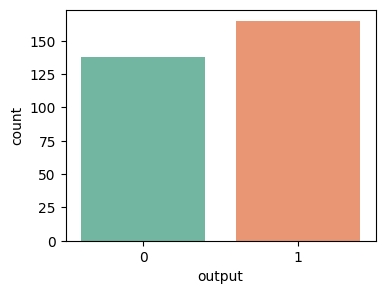

In [44]:
plt.figure(figsize=(4,3))
custom_palette = sns.color_palette("Set2")
sns.countplot(x='output', data=data, palette=custom_palette);

<Figure size 400x300 with 0 Axes>

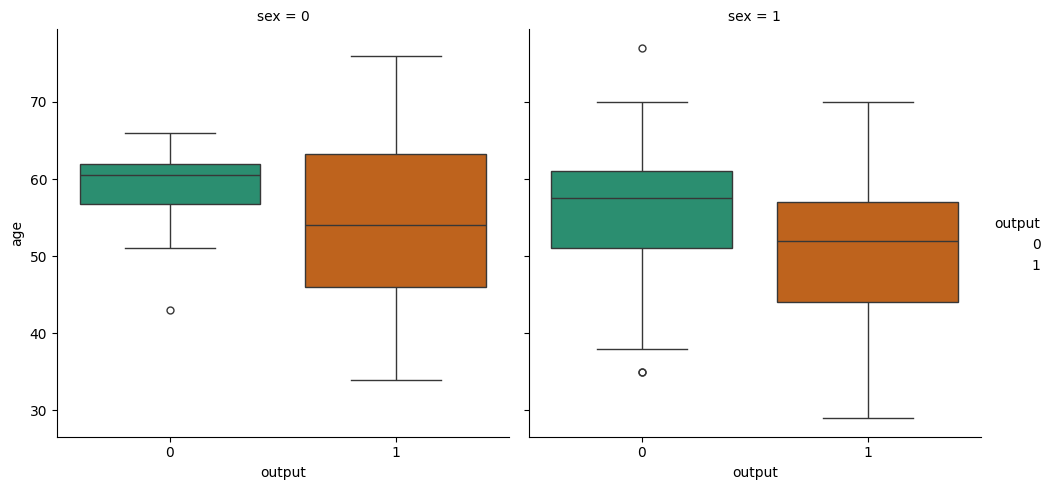

<Figure size 400x300 with 0 Axes>

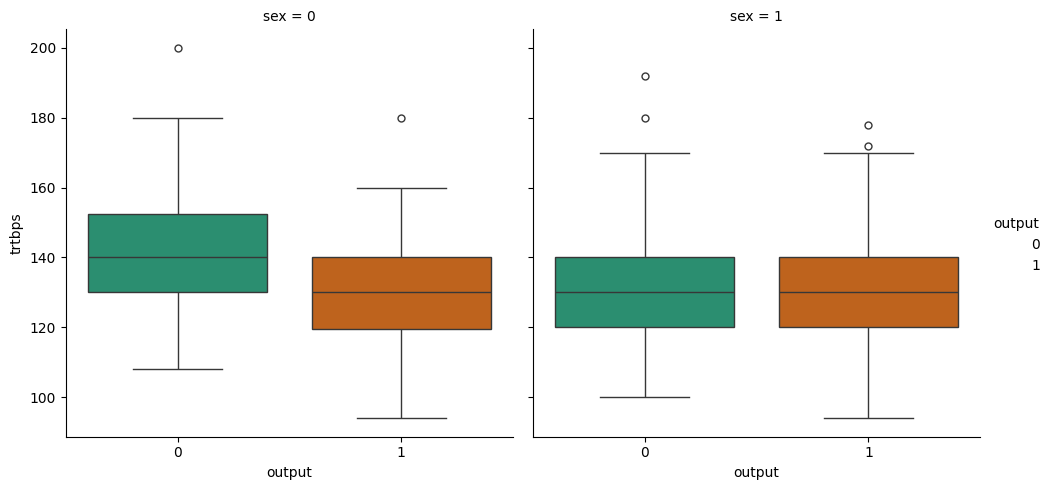

<Figure size 400x300 with 0 Axes>

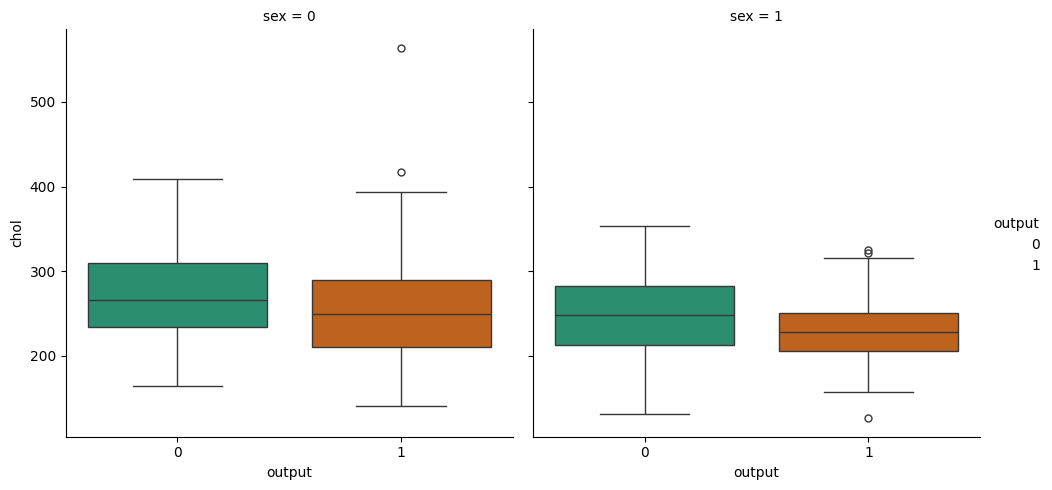

<Figure size 400x300 with 0 Axes>

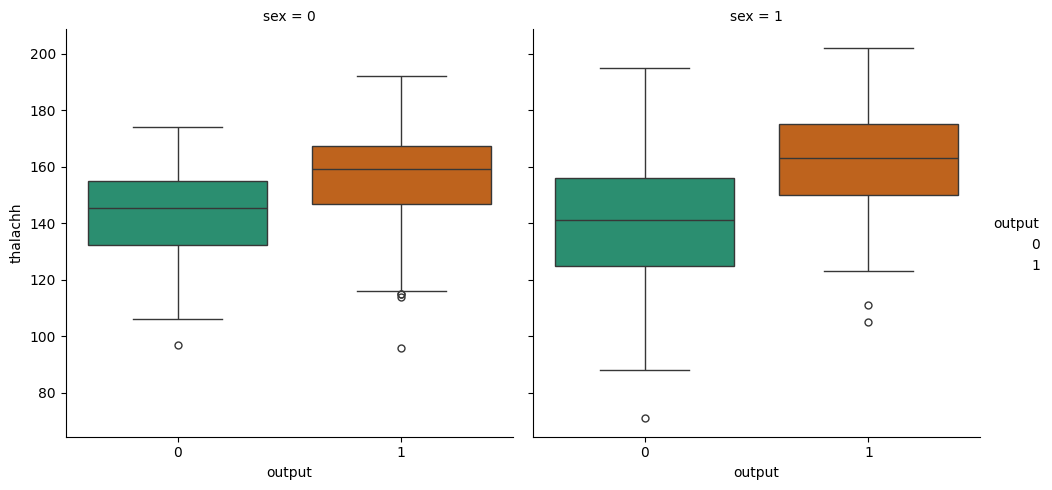

<Figure size 400x300 with 0 Axes>

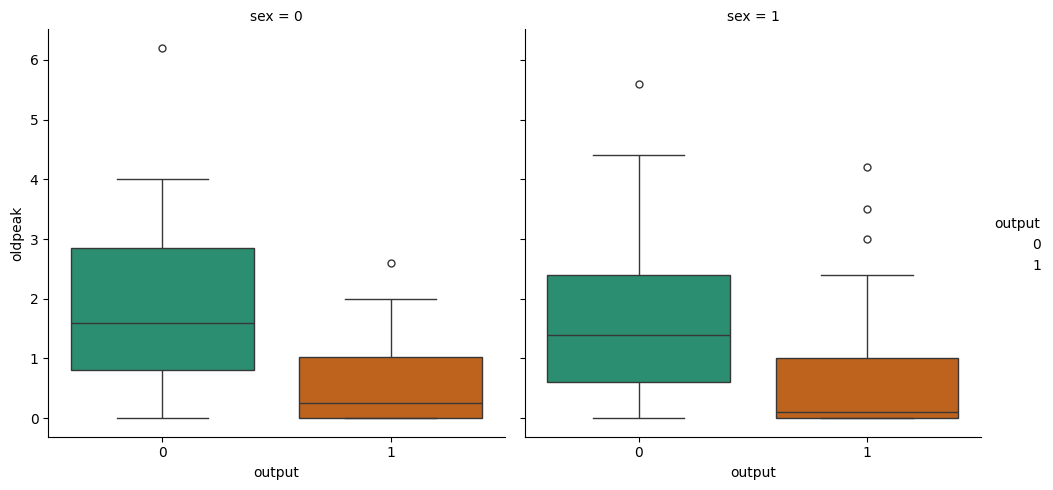

In [58]:
variables = ['age','trtbps','chol','thalachh','oldpeak']

for k in variables:
    plt.figure(figsize=(4,3));
    #sns.boxplot(x=k, data=data)
    sns.catplot(x='output',
                y=k,
                data=data,
                kind='box',
                col='sex',
                palette='Dark2');

In [46]:

var=['sex','cp','fbs','restecg','exng','slp','caa','thall']
for m in var:
    print(data[m].value_counts())

sex
1    207
0     96
Name: count, dtype: int64
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
fbs
0    258
1     45
Name: count, dtype: int64
restecg
1    152
0    147
2      4
Name: count, dtype: int64
exng
0    204
1     99
Name: count, dtype: int64
slp
2    142
1    140
0     21
Name: count, dtype: int64
caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64
thall
2    166
3    117
1     18
0      2
Name: count, dtype: int64


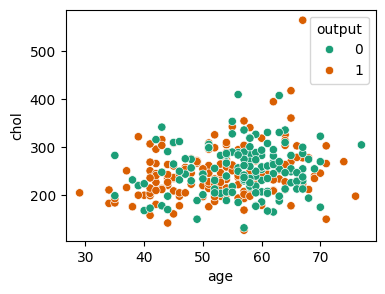

In [87]:
plt.figure(figsize=(4,3))

sns.scatterplot(x='age',
                y ='chol',
                data = data,
                hue = 'output',
                palette ='Dark2');

#### 4. Fractionnement Entraînement Test

In [61]:
X = data.drop('output',axis=1)
y = data['output']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [68]:
h = [X_train, X_test, y_train, y_test]
for element in h:
    print(element.shape)

(242, 13)
(61, 13)
(242,)
(61,)


#### 5. Modèles

#### A. Arbre de décision

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
model = DecisionTreeClassifier(random_state = 100)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [73]:
base_pred = model.predict(X_test)
base_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1])

#### Evaluation

In [74]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [75]:
confusion_matrix(y_test, base_pred)

array([[22, 11],
       [ 5, 23]])

<Figure size 100x100 with 0 Axes>

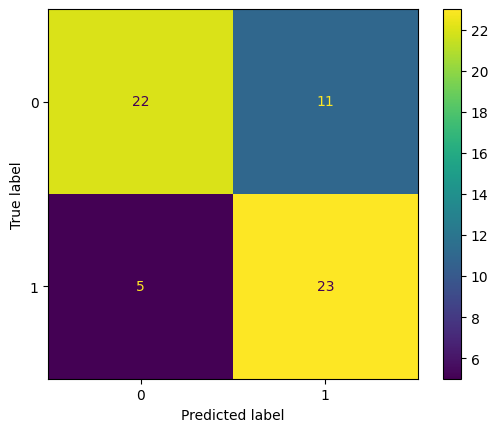

In [80]:
plt.figure(figsize=(1,1))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [81]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73        33
           1       0.68      0.82      0.74        28

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



In [85]:
#model.feature_importances_
pd.DataFrame(index=X.columns,
             data=model.feature_importances_,
             columns= ['Feature Importance']).sort_values(['Feature Importance'])

,Feature Importance
fbs,0.000000
slp,0.000000
exng,0.003809
restecg,0.021029
trtbps,0.024959
sex,0.052645
oldpeak,0.086396
thalachh,0.093093
caa,0.100664
age,0.117477
